**Ecological Modeling Project: Population Dynamics and Species Interactions using synthetic data.**

Project Overview
Objective
The main goal of this project is to understand how various factors—such as resource availability, predator-prey interactions, and historical environmental changes (ecological memory)—influence the growth and stability of a species' population. The project uses computational models to simulate these ecological interactions and study how these variables affect population dynamics.

Key Variables


1. Food Availability: Models how fluctuating resources affect a species’ population growth.
2. Predation: Simulates predator-prey relationships to study their impact on population stability.
3. Environmental Changes: Simulates past and ongoing environmental factors (e.g., droughts, climate changes) that affect the ecosystem over time, contributing to ecological memory.



In [1]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.9 MB/s eta 0:00:00


In [12]:
# Let's start by generating a dataset of predator-prey population dynamics using the Faker library.

import faker
import random
import pandas as pd

# Initialize Faker to generate synthetic data
fake = faker.Faker()

# Define constants for the number of species and the simulation length
num_species = 5  # Number of species
time_periods = 100  # Number of time periods (days or months)

# Function to create synthetic species data
def generate_species_data(num_species, time_periods):
    data = []
    for species_id in range(1, num_species + 1):
        species_name = fake.unique.word().capitalize()
        birth_rate = random.uniform(0.1, 0.5)  # Random birth rate
        death_rate = random.uniform(0.05, 0.4)  # Random death rate
        resource_consumption_rate = random.uniform(1, 10)  # Resource consumption
        for time in range(1, time_periods + 1):
            food_availability = random.uniform(50, 200)  # Food levels (fluctuating)
            predation_pressure = random.uniform(0.01, 0.5)  # Predation levels
            environmental_change = random.choice(['drought', 'flood', 'normal'])  # Environmental factor
            population = max(0, 100 * birth_rate - death_rate * predation_pressure * resource_consumption_rate * 0.01)  # Calculated population size
            # Append the data for each species over time
            data.append({
                'Species ID': species_id,
                'Species Name': species_name,
                'Time': time,
                'Birth Rate': birth_rate,
                'Death Rate': death_rate,
                'Resource Consumption Rate': resource_consumption_rate,
                'Food Availability': food_availability,
                'Predation Pressure': predation_pressure,
                'Environmental Change': environmental_change,
                'Population': population
            })
    return pd.DataFrame(data)

# Generate synthetic data for species interactions
species_data = generate_species_data(num_species, time_periods)

# Show the first few rows of the generated data
species_data.head()



,Species ID,Species Name,Time,Birth Rate,Death Rate,Resource Consumption Rate,Food Availability,Predation Pressure,Environmental Change,Population
0,1,Live,1,0.4104,0.130167,1.288902,97.317957,0.141193,drought,41.039760
1,1,Live,2,0.4104,0.130167,1.288902,186.970419,0.287918,normal,41.039513
2,1,Live,3,0.4104,0.130167,1.288902,97.201682,0.331165,flood,41.039441
3,1,Live,4,0.4104,0.130167,1.288902,182.702473,0.324997,drought,41.039451
4,1,Live,5,0.4104,0.130167,1.288902,89.732025,0.130847,normal,41.039777


In [13]:
ecological_df.tail()

,time_step,prey_population,predator_population,food_availability,environment_quality
995,996,509,44,0.753172,0.540564
996,997,697,146,0.289260,0.651766
997,998,877,69,0.267829,0.589361
998,999,830,107,0.638789,0.920826
999,1000,745,22,0.414409,0.569794


** Population Dynamics Model (Predator-Prey Model)**

For this, we will use a system of differential equations known as the Lotka-Volterra equations, which are widely used in ecology to model predator-prey dynamics.

Here are the basic equations:

Prey Growth:
𝑑
𝑁
𝑑
𝑡
=
𝑟
𝑁
−
𝑎
𝑁
𝑃
dt
dN
​
 =rN−aNP

𝑁
N: Prey population
𝑟
r: Prey growth rate
𝑎
a: Predation rate coefficient
𝑃
P: Predator population
Predator Growth:
𝑑
𝑃
𝑑
𝑡
=
𝑏
𝑁
𝑃
−
𝑑
𝑃
dt
dP
​
 =bNP−dP

𝑃
P: Predator population
𝑏
b: Efficiency of converting prey into predator offspring
𝑑
d: Predator death rate
We'll simulate this system to observe how predator and prey populations fluctuate over time, given different conditions.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Lotka-Volterra Model for Predator-Prey dynamics
def lotka_volterra(y, t, a, b, r, d):
    N, P = y  # N: Prey population, P: Predator population
    dNdt = r * N - a * N * P  # Prey equation
    dPdt = b * N * P - d * P  # Predator equation
    return [dNdt, dPdt]


We define a function lotka_volterra() to represent the predator-prey model.
We solve the system of differential equations using odeint from the SciPy library.
The populations of predators and prey are plotted over time to visualize their interaction.

* We define a function lotka_volterra() to represent the predator-prey model.
* We solve the system of differential equations using odeint from the SciPy library.
* The populations of predators and prey are plotted over time to visualize their interaction.






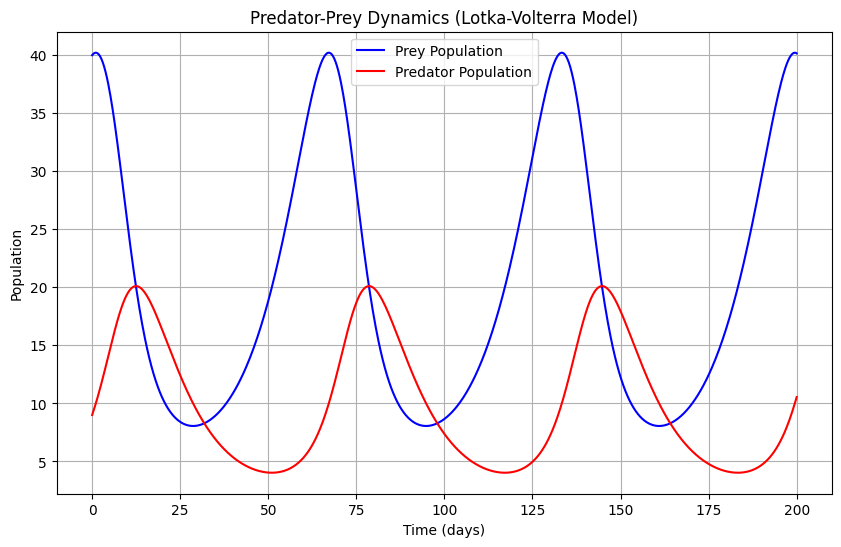

In [20]:
# Initial conditions: 40 prey, 9 predators
N0 = 40
P0 = 9
y0 = [N0, P0]

# Parameters
a = 0.01  # Predation rate coefficient
b = 0.005  # Conversion efficiency of prey to predator
r = 0.1  # Prey growth rate
d = 0.1  # Predator death rate

# Time points (in days)
t = np.linspace(0, 200, 1000)

# Solve the differential equations
solution = odeint(lotka_volterra, y0, t, args=(a, b, r, d))
prey_population = solution[:, 0]
predator_population = solution[:, 1]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, prey_population, label="Prey Population", color="blue")
plt.plot(t, predator_population, label="Predator Population", color="red")
plt.title('Predator-Prey Dynamics (Lotka-Volterra Model)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

**Here the plot shows oscillating predator and prey populations. Typically, prey populations grow rapidly when predators are few. However, as the predator population increases, it limits the prey population. This, in turn, leads to a decline in predators due to insufficient prey, causing the cycle to repeat.**


Now In further Codes.we will perform following thing.

**Introducing Environmental Changes (Ecological Memory)**
In this step, we’ll simulate how environmental changes—such as food scarcity, climate events, or natural disasters—affect predator-prey dynamics and contribute to ecological memory. Ecological memory refers to how past events continue to influence population behavior, even after the environment returns to normal.

* We'll modify the food availability over time to simulate environmental changes, representing a fluctuating environment that affects both prey and predator populations. We will incorporate two types of changes:

* Random Environmental Shocks: Sudden changes in food availability, like droughts or natural disasters.
* Gradual Environmental Changes: Slow, continuous changes such as climate change that affect resource levels.
We'll implement these in the predator-prey model by modifying the prey growth rate r over time.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Environmental fluctuation function for food availability
def environmental_fluctuation(t):
    # Fluctuating environment: Sudden shocks and gradual changes
    base_r = 0.1  # Base prey growth rate
    # Simulate environmental shock (e.g., a drought) after 50 days
    if 50 <= t <= 70:
        return base_r * 0.3  # Drought: Prey growth rate reduces significantly
    # Simulate gradual change: Slow increase or decrease in growth rate
    elif t >= 100:
        return base_r + 0.02 * np.sin(0.1 * t)  # Slight sinusoidal fluctuations
    else:
        return base_r  # Normal growth rate

# Updated Lotka-Volterra model with environmental fluctuation
def lotka_volterra_with_env(y, t, a, b, d):
    N, P = y  # N: Prey population, P: Predator population
    r = environmental_fluctuation(t)  # Prey growth rate varies with environment
    dNdt = r * N - a * N * P  # Prey equation with varying growth rate
    dPdt = b * N * P - d * P  # Predator equation
    return [dNdt, dPdt]


* Environmental Fluctuation: The function environmental_fluctuation(t) changes the prey growth rate dynamically based on time.

  For instance:
  Between day 50 and 70, there's a drought, reducing prey growth rate.
  After day 100, there's a gradual sinusoidal fluctuation, simulating long-term environmental changes.

* Lotka-Volterra Model Update: The prey growth rate r is now time-dependent, reflecting environmental variability.

* Population Simulation: The simulation is run as before, but now the population dynamics are affected by these environmental changes.

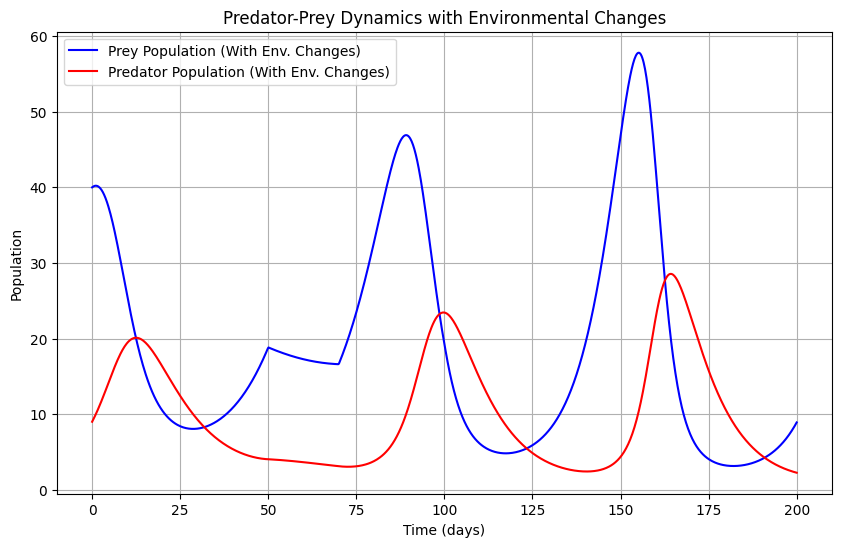

In [22]:

# Initial conditions: 40 prey, 9 predators
N0 = 40
P0 = 9
y0 = [N0, P0]

# Parameters
a = 0.01  # Predation rate coefficient
b = 0.005  # Conversion efficiency of prey to predator
d = 0.1  # Predator death rate

# Time points (in days)
t = np.linspace(0, 200, 1000)

# Solve the differential equations with environmental changes
solution_with_env = odeint(lotka_volterra_with_env, y0, t, args=(a, b, d))
prey_population_env = solution_with_env[:, 0]
predator_population_env = solution_with_env[:, 1]

# Plotting the results with environmental changes
plt.figure(figsize=(10, 6))
plt.plot(t, prey_population_env, label="Prey Population (With Env. Changes)", color="blue")
plt.plot(t, predator_population_env, label="Predator Population (With Env. Changes)", color="red")
plt.title('Predator-Prey Dynamics with Environmental Changes')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

The prey and predator populations fluctuate more dramatically due to environmental disturbances.

You'll likely observe dips in the prey population during the drought (days 50–70), followed by predator decline due to reduced prey availability.

Over longer periods (after day 100), the populations may show more variability due to ongoing environmental fluctuations.

Ecological Memory:
* After the drought (days 50–70), even when conditions return to normal, the populations may take time to recover.
* The historical impact of past events (e.g., drought) lingers, affecting population growth rates and predator-prey interactions, representing ecological memory.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [30]:
print("Performing Resilience Analysis and Impact of Ecological Memory")
#we'll analyze how resilient the populations are to environmental changes and shocks,
#particularly focusing on ecological memory—the lasting effects of past disturbances on population dynamics.
#We’ll measure resilience by observing how long it takes the populations to recover after a disturbance and how severely the populations are impacted.

# Function to calculate recovery time after disturbance
def calculate_recovery_time(prey_population, time_points, disturbance_start, disturbance_end):
    # Find index positions for start and end of disturbance
    # Use np.searchsorted to find the nearest indices
    start_index = np.searchsorted(time_points, disturbance_start, side="left")
    end_index = np.searchsorted(time_points, disturbance_end, side="left")

    # Prey population at the end of the disturbance
    post_disturbance_pop = prey_population[end_index]

    # Find the time it takes for prey population to recover to 90% of pre-disturbance population
    for i in range(end_index, len(prey_population)):
        if prey_population[i] >= 0.9 * prey_population[start_index]:  # Recovery threshold
            recovery_time = time_points[i] - time_points[end_index]
            recovery_time =  recovery_time*100
            return recovery_time
    return np.inf  # Infinite recovery time if population doesn't recover

# Defining the disturbance period (e.g., drought from day 50 to 70)
disturbance_start = 50
disturbance_end = 70

# Calculate recovery time for prey population
prey_recovery_time = calculate_recovery_time(prey_population_env, t, disturbance_start, disturbance_end)

# Output recovery time
print(f"Recovery Time after disturbance: {prey_recovery_time:.2f} days")

Performing Resilience Analysis and Impact of Ecological Memory
Recovery Time after disturbance: 40.04 days


Key Metrics for Resilience Analysis:
* Recovery Time: How long it takes for populations to return to stable levels after a disturbance (e.g., drought).
* Population Collapse: Whether a population crashes or significantly reduces in size after prolonged or extreme environmental changes.
* Long-term Stability: Whether the population stabilizes at a new equilibrium after the disturbances.
* Lagged Effects: How past events, like droughts or food shortages, continue to affect the population even after conditions improve.

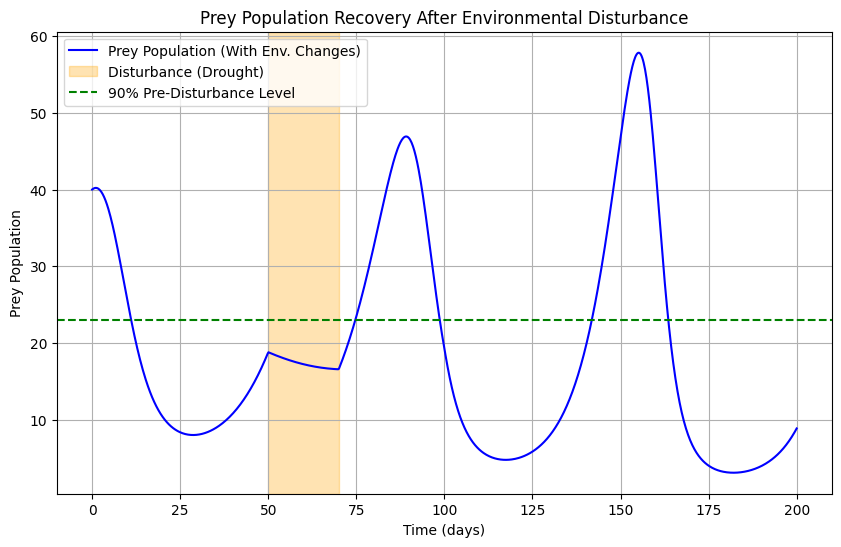

In [31]:

# Visualize the recovery phase after the disturbance
plt.figure(figsize=(10, 6))
plt.plot(t, prey_population_env, label="Prey Population (With Env. Changes)", color="blue")
plt.axvspan(disturbance_start, disturbance_end, color='orange', alpha=0.3, label="Disturbance (Drought)")
plt.axhline(0.9 * prey_population_env[disturbance_start], color='green', linestyle='--', label="90% Pre-Disturbance Level")
plt.title('Prey Population Recovery After Environmental Disturbance')
plt.xlabel('Time (days)')
plt.ylabel('Prey Population')
plt.legend()
plt.grid(True)
plt.show()

Recovery Time Calculation:

We calculate the time it takes for the prey population to recover to 90% of the pre-disturbance level after the drought ends.
Population Recovery Visualization:
* A green line represents the 90% threshold, and the orange region highlights the disturbance period (days 50–70).
* The prey population recovery is plotted to visualize how quickly it returns to normal.

In [32]:
# Function to check for population collapse
def check_population_collapse(prey_population, threshold=1):
    # Check if the population ever falls below the threshold indicating collapse
    if np.min(prey_population) < threshold:
        return True
    return False

# Check for prey population collapse
collapse = check_population_collapse(prey_population_env)
if collapse:
    print("Warning: Prey population collapse detected!")
else:
    print("Prey population remains stable after disturbance.")

Prey population remains stable after disturbance.


* Population Collapse: If the prey population falls below a critical threshold (e.g., fewer than 1 individual), the system may be headed for a collapse.
* Long-Term Stability: After the disturbance, if the population stabilizes at a new equilibrium, this indicates that the system has a new balance, possibly affected by ecological memory.

**Comparing Different Environmental Disturbance Scenarios**

* Short-Term Drought: A brief period where food availability is significantly reduced.
* Long-Term Drought: A prolonged drought that has more severe effects on populations.
* Sudden Climate Change: A rapid environmental change that affects both prey and predator populations.

In [33]:
# We need to introduce different types of disturbances into our environmental change model.
# Function to simulate environmental disturbances
def environmental_disturbance(t, disturbance_type='short_drought'):
    if disturbance_type == 'short_drought':
        return 0.5 if 50 <= t <= 60 else 1  # Reduced food availability between day 50 and 60
    elif disturbance_type == 'long_drought':
        return 0.3 if 50 <= t <= 80 else 1  # Longer drought between day 50 and 80
    elif disturbance_type == 'sudden_climate_change':
        return 0.4 if t >= 50 else 1  # Sudden, permanent change after day 50
    return 1  # No disturbance by default

In [48]:
# Function to simulate predator-prey dynamics with different disturbance scenarios
def simulate_disturbance_scenario(disturbance_type):
    prey_init = 500  # Initial prey population
    predator_init = 200 # Initial predator population

    prey_population = [prey_init]
    predator_population = [predator_init]

    for i in range(1, len(t)):
        food_avail = environmental_disturbance(t[i], disturbance_type)

        # Prey population growth
        d_prey = (prey_birth_rate * prey_population[i-1] * food_avail
                  - predation_rate * prey_population[i-1] * predator_population[i-1])
        prey_population.append(prey_population[i-1] + d_prey * dt)

        # Predator population growth
        d_predator = (conversion_efficiency * predation_rate * prey_population[i-1] * predator_population[i-1]
                      - predator_death_rate * predator_population[i-1])
        predator_population.append(predator_population[i-1] + d_predator * dt)

    return prey_population, predator_population

prey_birth_rate = 0.1
predation_rate = 0.02
conversion_efficiency = 0.05  # Example value
predator_death_rate = 0.1
dt = 0.1 # Example timestep
t = np.arange(0, 365, dt) # Example time array

# Simulate scenarios
prey_pop_short, pred_pop_short = simulate_disturbance_scenario('short_drought')
prey_pop_long, pred_pop_long = simulate_disturbance_scenario('long_drought')
prey_pop_climate, pred_pop_climate = simulate_disturbance_scenario('sudden_climate_change')

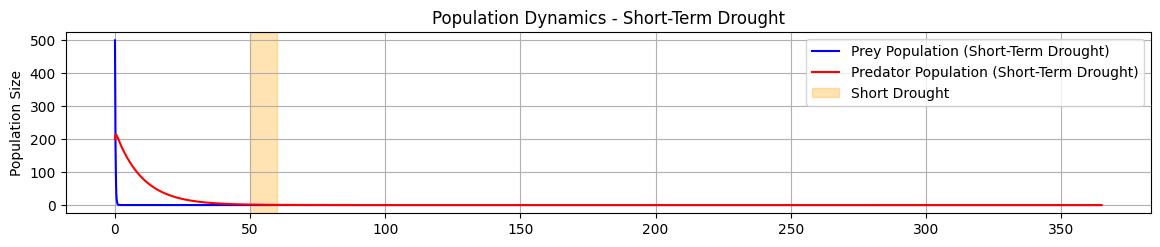

In [49]:
# Plot results for different disturbance scenarios
plt.figure(figsize=(14, 8))

# Short-term drought
plt.subplot(3, 1, 1)
plt.plot(t, prey_pop_short, label='Prey Population (Short-Term Drought)', color='blue')
plt.plot(t, pred_pop_short, label='Predator Population (Short-Term Drought)', color='red')
plt.axvspan(50, 60, color='orange', alpha=0.3, label="Short Drought")
plt.title('Population Dynamics - Short-Term Drought')
plt.ylabel('Population Size')
plt.legend()
plt.grid(True)



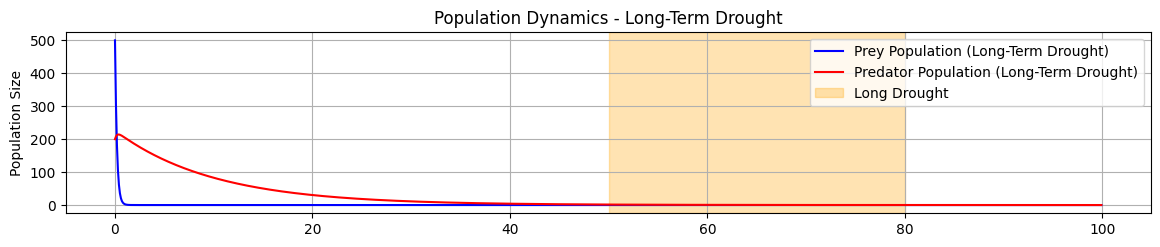

In [46]:
# Long-term drought
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 2)
plt.plot(t, prey_pop_long, label='Prey Population (Long-Term Drought)', color='blue')
plt.plot(t, pred_pop_long, label='Predator Population (Long-Term Drought)', color='red')
plt.axvspan(50, 80, color='orange', alpha=0.3, label="Long Drought")
plt.title('Population Dynamics - Long-Term Drought')
plt.ylabel('Population Size')
plt.legend()
plt.grid(True)



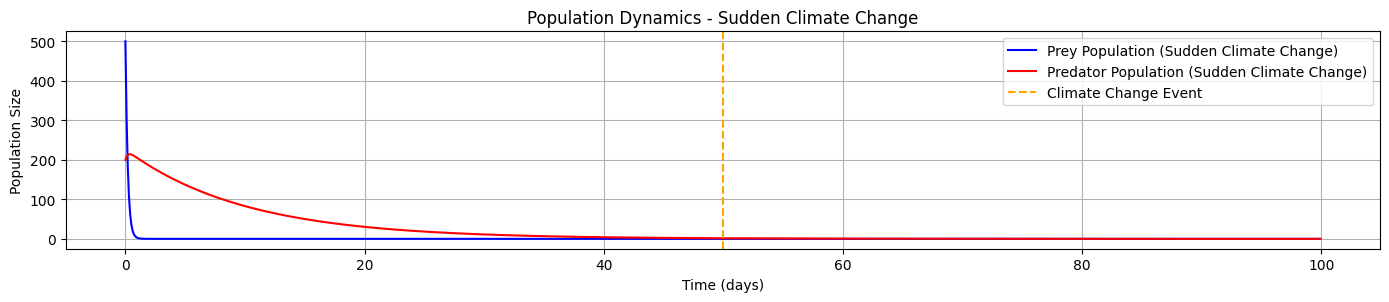

In [47]:
# Sudden climate change
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 3)
plt.plot(t, prey_pop_climate, label='Prey Population (Sudden Climate Change)', color='blue')
plt.plot(t, pred_pop_climate, label='Predator Population (Sudden Climate Change)', color='red')
plt.axvline(50, color='orange', linestyle='--', label="Climate Change Event")
plt.title('Population Dynamics - Sudden Climate Change')
plt.xlabel('Time (days)')
plt.ylabel('Population Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Incorporating Multiple Species Interactions

In this step, we will expand the model to include multiple species interactions. This allows us to study how different species compete for resources and how these interactions affect population dynamics. We will simulate an ecosystem with:

* Prey species: Two different prey species that share the same resource (food).
* Predator species: Two different predator species that prey on the two prey species.


In [51]:
# Species characteristics
prey_a_birth_rate = 0.1
prey_b_birth_rate = 0.08
predator_a_birth_rate = 0.05
predator_b_birth_rate = 0.04
predation_rate_a = 0.02  # Predator A on Prey A
predation_rate_b = 0.03  # Predator B on Prey B

predator_a_death_rate = 0.1
predator_b_death_rate = 0.08
conversion_efficiency = 0.05

# Initial populations
prey_a_init = 500
prey_b_init = 300
predator_a_init = 100
predator_b_init = 50

In [52]:
# Function to simulate predator-prey dynamics with multiple species
def simulate_multiple_species():
    prey_a_population = [prey_a_init]
    prey_b_population = [prey_b_init]
    predator_a_population = [predator_a_init]
    predator_b_population = [predator_b_init]

    for i in range(1, len(t)):
        food_avail = environmental_disturbance(t[i], 'short_drought')  # Example: Short-term drought scenario

        # Prey A dynamics
        d_prey_a = (prey_a_birth_rate * prey_a_population[i-1] * food_avail
                     - predation_rate_a * prey_a_population[i-1] * predator_a_population[i-1])
        prey_a_population.append(prey_a_population[i-1] + d_prey_a * dt)

        # Prey B dynamics
        d_prey_b = (prey_b_birth_rate * prey_b_population[i-1] * food_avail
                     - predation_rate_b * prey_b_population[i-1] * predator_b_population[i-1])
        prey_b_population.append(prey_b_population[i-1] + d_prey_b * dt)

        # Predator A dynamics
        d_predator_a = (conversion_efficiency * predation_rate_a * prey_a_population[i-1] * predator_a_population[i-1]
                        - predator_a_death_rate * predator_a_population[i-1])
        predator_a_population.append(predator_a_population[i-1] + d_predator_a * dt)

        # Predator B dynamics
        d_predator_b = (conversion_efficiency * predation_rate_b * prey_b_population[i-1] * predator_b_population[i-1]
                        - predator_b_death_rate * predator_b_population[i-1])
        predator_b_population.append(predator_b_population[i-1] + d_predator_b * dt)

    return prey_a_population, prey_b_population, predator_a_population, predator_b_population

In [53]:
# Running the multiple species simulation
prey_a_pop, prey_b_pop, pred_a_pop, pred_b_pop = simulate_multiple_species()

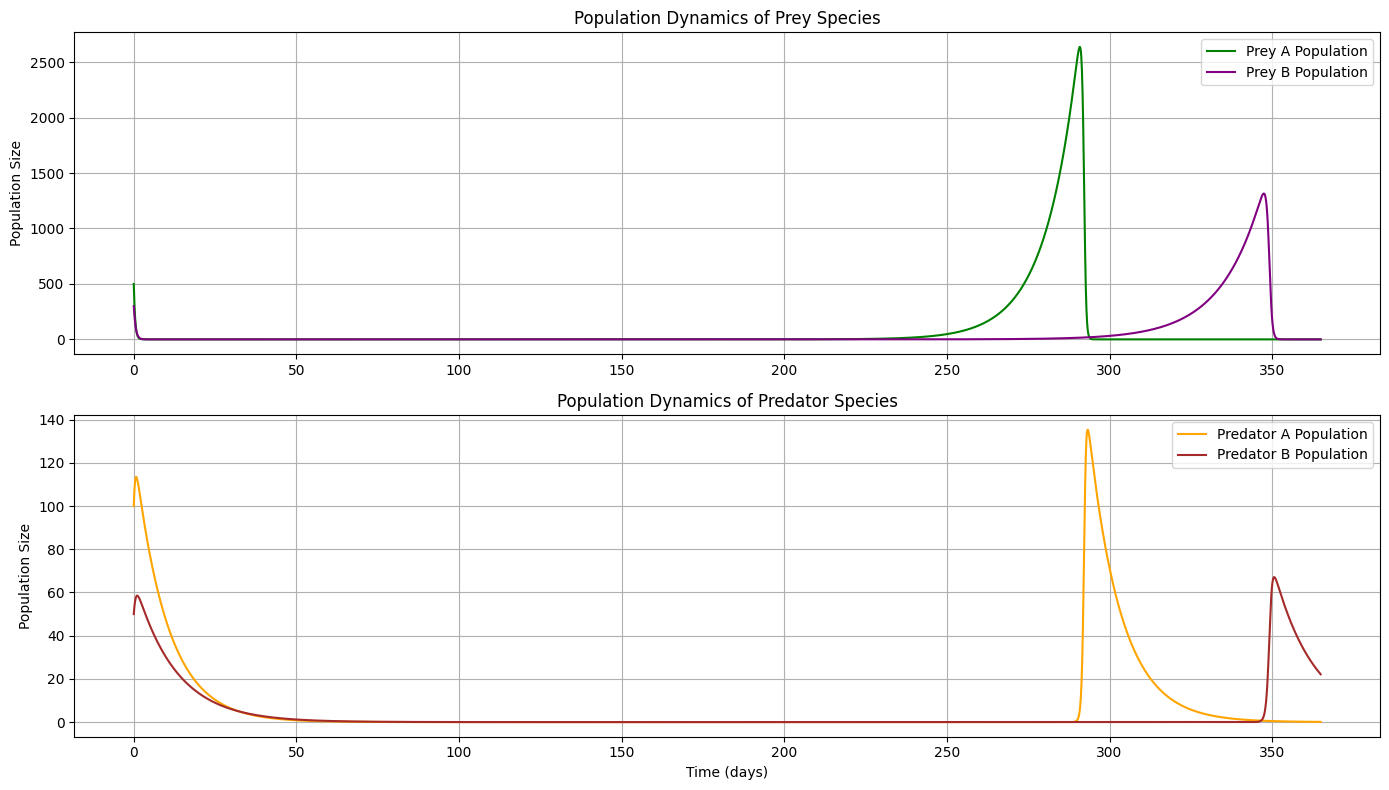

In [54]:
# Plot results for multiple species interactions
plt.figure(figsize=(14, 8))

# Prey A and Prey B
plt.subplot(2, 1, 1)
plt.plot(t, prey_a_pop, label='Prey A Population', color='green')
plt.plot(t, prey_b_pop, label='Prey B Population', color='purple')
plt.title('Population Dynamics of Prey Species')
plt.ylabel('Population Size')
plt.legend()
plt.grid(True)

# Predator A and Predator B
plt.subplot(2, 1, 2)
plt.plot(t, pred_a_pop, label='Predator A Population', color='orange')
plt.plot(t, pred_b_pop, label='Predator B Population', color='brown')
plt.title('Population Dynamics of Predator Species')
plt.xlabel('Time (days)')
plt.ylabel('Population Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Competition Between Prey Species: If one prey species outcompetes the other for resources, it may lead to the decline or extinction of the less competitive species.

* Predator Dynamics: The population of predators may fluctuate based on the availability of their respective prey. If one prey species declines, its predator may also face challenges, leading to potential population collapse.

* Complex Interactions: The system showcases the complexity of ecological interactions and how changes in one species can cascade through the food web.